In [1]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import requests

- 실습에 활용할 image를 인터넷으로부터 가져옵니다.

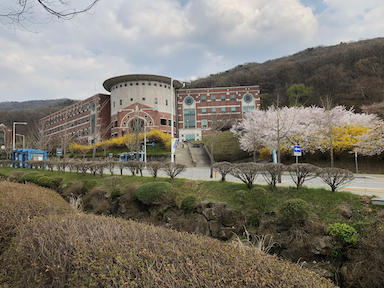

In [2]:
# web image
url = "https://raw.githubusercontent.com/hufsbme/T10402101/master/ch7_modern_ConvNets/hufs_campus.png"
I = Image.open(requests.get(url, stream=True).raw).convert("RGB")
I

- PIL로 불러온 데이터를 numpy array로 변환하고, data를 관찰합니다.

In [3]:
X = np.array(I)
print(X.shape)
print(X.dtype)
print(np.max(X))
print(np.min(X))

(288, 384, 3)
uint8
240
0


- Numpy array를 PyTorch Tensor로 변환하고, network의 input으로 활용할 수 있는 형태로 변환합니다.

torch.Size([1, 1, 288, 384])


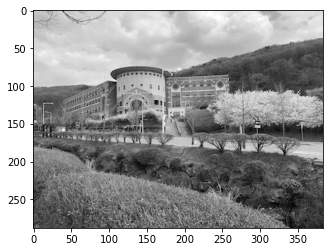

In [4]:
x = torch.tensor(X[:,:,0]/255.0)
x = x.type(torch.FloatTensor).unsqueeze(0).unsqueeze(0)
print(x.shape)

plt.imshow(x[0,0],cmap='gray')
plt.show()

- 2D convolution layer를 in_channels, out_channels, kernel_size, padding, stride 등을 바꾸어 가며 정의하고, 정의한 레이어 및 영상입력에 대한 결과를 관찰합니다.

In [5]:
myconv = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,padding=1,stride=1,bias=False)

In [6]:
print(myconv)
print(myconv.weight.data)

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
tensor([[[[-0.0887,  0.1664,  0.2238],
          [ 0.2710,  0.3302,  0.0456],
          [-0.2802, -0.2781, -0.1841]]]])


torch.Size([1, 1, 288, 384]) torch.Size([1, 1, 288, 384])


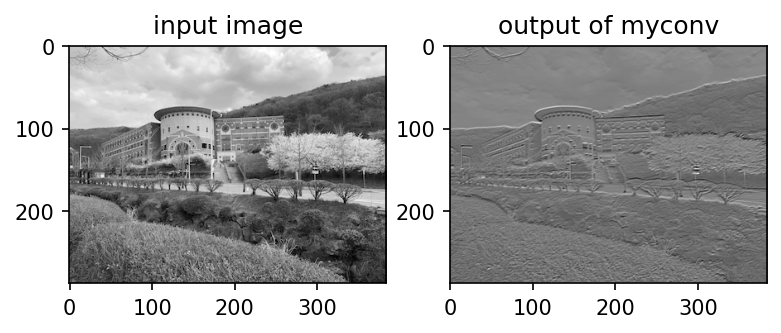

In [7]:
y = myconv(x)
print(x.shape,y.shape)
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(x[0,0],cmap='gray')
plt.title('input image')
plt.subplot(122)
plt.imshow(y[0,0].detach(),cmap='gray')
plt.title('output of myconv')
plt.show()

- Random으로 초기화된 weight 대신, 직접 weight의 값을 정의하여 결과를 확인해 봅시다.

In [8]:
myconv.weight.data[0,0,:,:] = torch.tensor([[1.,0,-1],
                                            [1,0,-1],
                                            [1,0,-1]])
print(myconv.weight.data[0,0])

tensor([[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]])


torch.Size([1, 1, 288, 384])


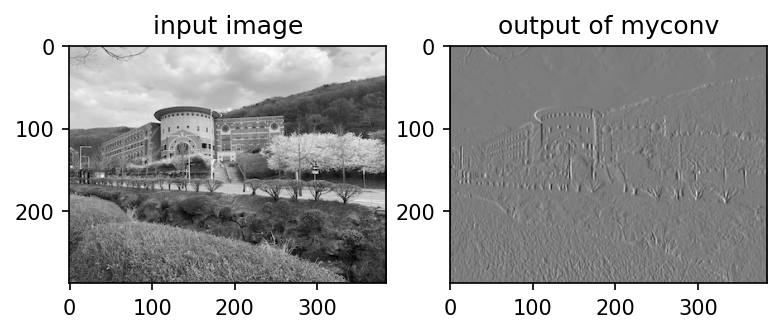

In [9]:
y = myconv(x)

print(y.shape)
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(x[0,0],cmap='gray')
plt.title('input image')
plt.subplot(122)
plt.imshow(y[0,0].detach(),cmap='gray')
plt.title('output of myconv')
plt.show()

- convolution kernel을 다양하게 바꾸어 가며 convolution의 결과가 영상의 어떤 변화를 가져오는 지를 살펴봅니다.

tensor([[ 2.0794, -0.9583, -1.3213],
        [ 1.1666,  0.2534, -0.3337],
        [-0.7952,  0.9675,  0.1275]])
torch.Size([1, 1, 288, 384])


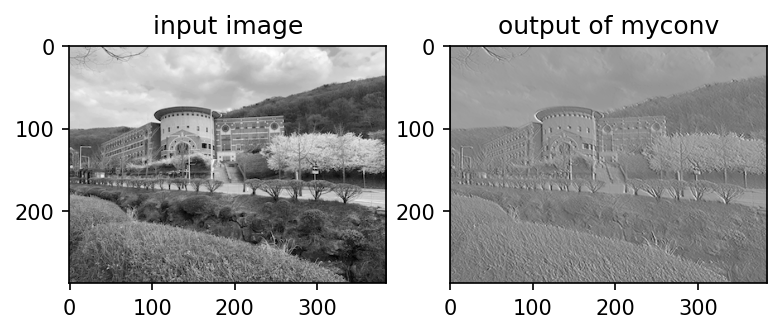

In [10]:
myconv.weight.data[0,0,:,:] = torch.normal(0,1,(3,3))
print(myconv.weight.data[0,0])
y = myconv(x)

print(y.shape)
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(x[0,0],cmap='gray')
plt.title('input image')
plt.subplot(122)
plt.imshow(y[0,0].detach(),cmap='gray')
plt.title('output of myconv')
plt.show()

conv. kernel: 
 tensor([[-1.9030, -0.2264, -0.4881],
        [ 0.1959, -1.7805, -1.0788],
        [ 0.7660, -0.0584, -0.1773]])
torch.Size([1, 1, 288, 384])


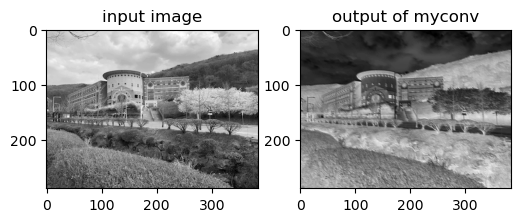

conv. kernel: 
 tensor([[-1.5877,  0.4661,  1.1257],
        [-2.2549,  0.6130,  3.2499],
        [-1.0954, -1.5641,  0.8762]])
torch.Size([1, 1, 288, 384])


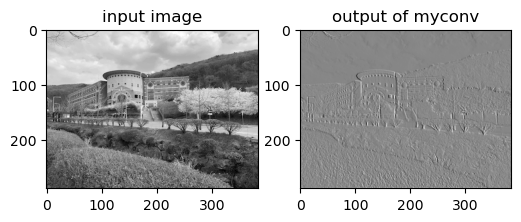

conv. kernel: 
 tensor([[ 1.4891, -0.7857,  1.1843],
        [ 0.9009, -1.1705, -1.7036],
        [-0.0503, -0.2142,  0.0531]])
torch.Size([1, 1, 288, 384])


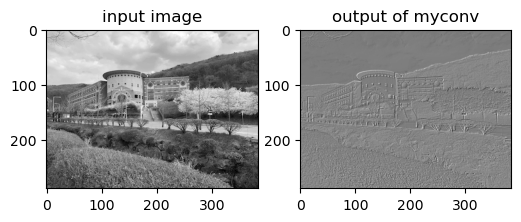

conv. kernel: 
 tensor([[ 0.8266, -0.4642, -0.5066],
        [-2.9761,  1.4534,  0.6371],
        [ 0.1391, -1.2804, -0.4948]])
torch.Size([1, 1, 288, 384])


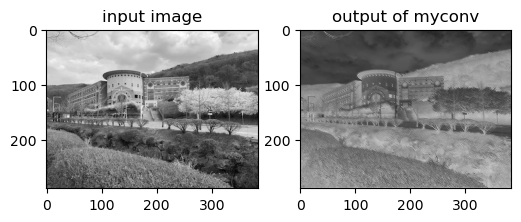

conv. kernel: 
 tensor([[ 1.0286, -1.9038,  0.9931],
        [-0.7862, -1.5409, -0.2958],
        [-0.6948, -0.3893,  1.1222]])
torch.Size([1, 1, 288, 384])


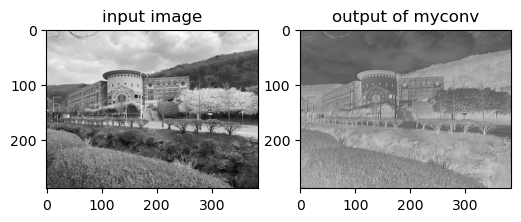

conv. kernel: 
 tensor([[ 0.5787, -2.1844,  0.4397],
        [-0.4404,  0.5029, -0.7439],
        [-0.1325, -1.6359,  0.8042]])
torch.Size([1, 1, 288, 384])


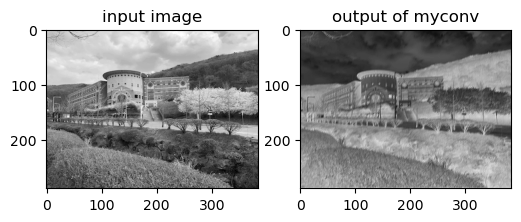

conv. kernel: 
 tensor([[-0.8139, -1.2488, -1.1354],
        [ 0.0265, -0.0095, -1.5296],
        [ 1.3136,  0.7159,  0.5272]])
torch.Size([1, 1, 288, 384])


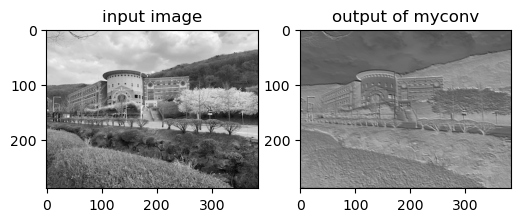

conv. kernel: 
 tensor([[ 0.1954, -1.4154,  0.7657],
        [ 1.2367, -1.0349,  1.4551],
        [ 0.0424,  0.8418,  0.2714]])
torch.Size([1, 1, 288, 384])


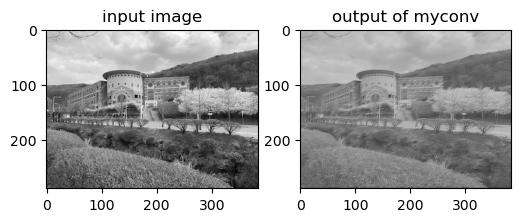

conv. kernel: 
 tensor([[ 1.5513, -1.0543,  0.4113],
        [ 0.0925, -1.0974,  1.6500],
        [ 0.6946, -1.0357,  1.2833]])
torch.Size([1, 1, 288, 384])


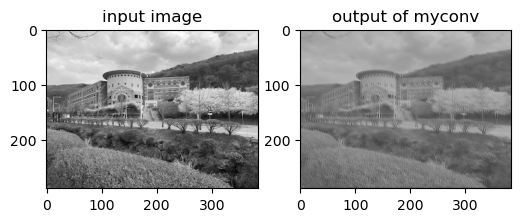

conv. kernel: 
 tensor([[ 0.2941,  0.9235, -0.9119],
        [ 1.5540,  0.3015,  0.0206],
        [ 0.8013,  1.9500,  2.0780]])
torch.Size([1, 1, 288, 384])


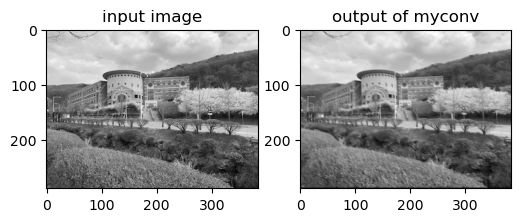

conv. kernel: 
 tensor([[ 1.1378, -2.2433,  0.5039],
        [-0.1672, -0.5694, -0.6257],
        [ 0.8565,  0.2149, -0.0506]])
torch.Size([1, 1, 288, 384])


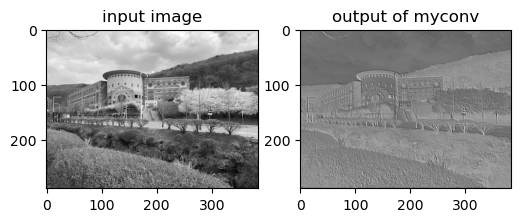

conv. kernel: 
 tensor([[ 0.0365,  0.6306,  1.4409],
        [-1.9919,  1.1167, -0.3447],
        [ 1.5163,  0.7543, -0.7473]])
torch.Size([1, 1, 288, 384])


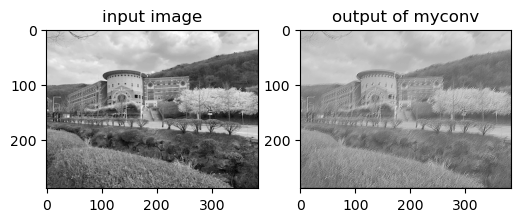

conv. kernel: 
 tensor([[ 0.4711,  0.5995, -1.1168],
        [-1.4389, -0.6411,  0.6656],
        [ 0.8582, -0.0174, -0.6860]])
torch.Size([1, 1, 288, 384])


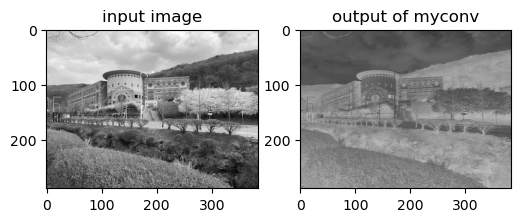

conv. kernel: 
 tensor([[ 0.3821, -2.1613, -0.1980],
        [ 0.6897, -2.1882,  0.7735],
        [-0.1935,  1.2126,  0.5282]])
torch.Size([1, 1, 288, 384])


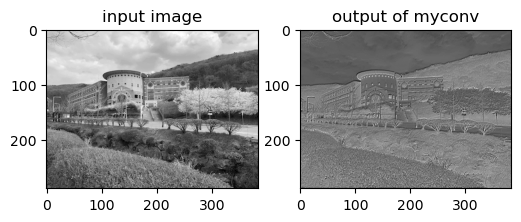

conv. kernel: 
 tensor([[ 0.4633,  0.3242,  0.0971],
        [ 1.1415, -1.1024, -2.6350],
        [ 0.8520,  1.0475, -1.0789]])
torch.Size([1, 1, 288, 384])


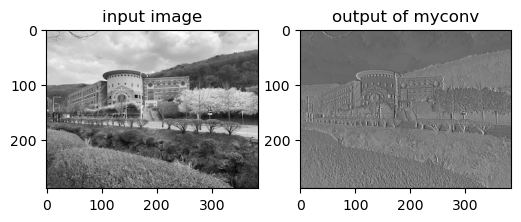

conv. kernel: 
 tensor([[-6.4853e-02,  8.0946e-01, -1.4106e-01],
        [-1.3953e+00,  1.0980e-01,  2.1248e-03],
        [-1.5925e-01,  4.6670e-01, -2.2857e+00]])
torch.Size([1, 1, 288, 384])


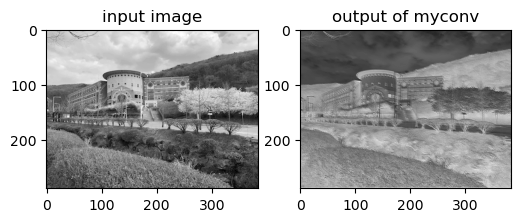

In [11]:
for n in range(16):
    myconv.weight.data[0,0,:,:] = torch.normal(0,1,(3,3))
    print("conv. kernel: \n",myconv.weight.data[0,0])
    y = myconv(x)

    print(y.shape)
    plt.figure(dpi=100)
    plt.subplot(121)
    plt.imshow(x[0,0],cmap='gray')
    plt.title('input image')
    plt.subplot(122)
    plt.imshow(y[0,0].detach(),cmap='gray')
    plt.title('output of myconv')
    plt.show()

- activation과 pooling을 다양한 조합으로 연결하여, 영상데이터가 어떻게 변하는가를 관찰합니다.

Sequential(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): Sigmoid()
  (2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 1, 72, 96])


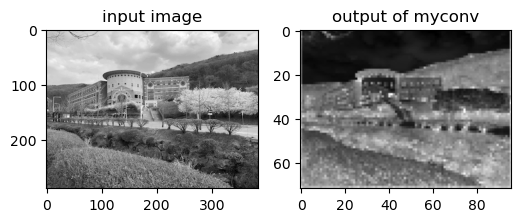

In [13]:
mycnn = torch.nn.Sequential(
    myconv,
    torch.nn.Sigmoid(),
    torch.nn.MaxPool2d(4),
)

print(mycnn)

y = mycnn(x)

print(y.shape)
plt.figure(dpi=100)
plt.subplot(121)
plt.imshow(x[0,0],cmap='gray')
plt.title('input image')
plt.subplot(122)
plt.imshow(y[0,0].detach(),cmap='gray')
plt.title('output of myconv')
plt.show()